### Steps taken:
Based on the exploratory data analytics performed I noticed a some outliers and multiple gaussians in various input variables. 
##### Outliers - 
Ouliers were noted in slag, super plastic and age. The outliers noticed in age is significant with a longer right tail. Since the number of data points with age greater than 200 days is only 33 I suggest we exclude these data in the training data in order to address the issue of data noise caused by these outliers. Also for these line items there could be a possibility that the age is over 200 days as the data collected could be maturity (days since the concrete was laid) and not the age at which it attained maximum strength possible.
##### Multiple gaussians
Noticed multiple gaussians on account of composition of slag, ash, super plastic, age, water, coarseagg and fineagg.
Since the use of ash has a very distinct mixture in the distribution as compared to other parameters where multiple gaussians were noticed the data set is split based on the use of ash in the mixutre.

##### Feature building based on the correlation noticed of the input variables with the target variable
From visualising the data distribution using a pair plot, it can be noted that cement has the highest correlation with the strength of the concrete. Accordingly, building a feature for the composition of cement out of the total material used to make the concrete.

##### Models built

Note: The below models were built separately for concrete made using ash and made without ash as distinct gaussians were observed in the kde distribution ploted in the pair plot on account of used of ash.

1. Simple linear regression model
2. Regularised linear regression model using ridge
3. Regularised linear regression model using lasso
4. Polynomial regression model
5. Regression model built using feature extracted using pca

##### Evaluation of models

The below models listed above were built on a training data set and evaluated on a validation data set. The accuracy scores observed in the simple linear regression models c.64% to c.77%. However, the accuracy scores on the model built using the extracted polynomial features were in the range of c. 80% to c.91%. Accordingly, the final model was built using the polynomial regression model

### Conclusion
The model accuracy scores observed on the training, validation and test data for the model built on concrete made without ash is c.91%, c.82% and c. 86% respectively. It could be inferred that the model built is likely to perform at a 82% to 91% accuracy when deployed to production.

The model accuracy scores observed on the training, validation and test data for the model built on concrete made using ash is c.92%, c.82% and c. 80% respectively. It could be inferred that the model built is likely to perform at a 80% to 92% accuracy when deployed to production.

In [456]:
# importing pandas and numpy to import the data set and work on data frames and arrays
import pandas as pd
import numpy as np

# importing matplotlib plotting libraries
import matplotlib.pyplot as plt

# to enable plotting graphs in jupyter notebooks
%matplotlib inline

# importing seaborn for statistical plots
import seaborn as sns

# importing sklearn package's data splitting function to split the data into training and testing set
from sklearn.model_selection import train_test_split

# importing metrics to calculate the accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer  

# importing linear models from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# importing polynomial feature building models from sklearn
from sklearn.preprocessing import PolynomialFeatures

# importing zscore convertor from scipy
from scipy.stats import zscore

# importing principal component analysis module from sklearn
from sklearn.decomposition import PCA

In [457]:
# importing the dataset as a dataframe using pandas
concrete_data = pd.read_csv('concrete.csv')
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [458]:
#Checking for empty cells in the data
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


There are no missing values or text values in any of the columns.

In [459]:
# Plotting the 5 point summary for the dataframe
concrete_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


We notice significant long right sided tails in slag, superplastic and age. Let's visualise the distribution better using a pairplot.

C:\Users\Jarvis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


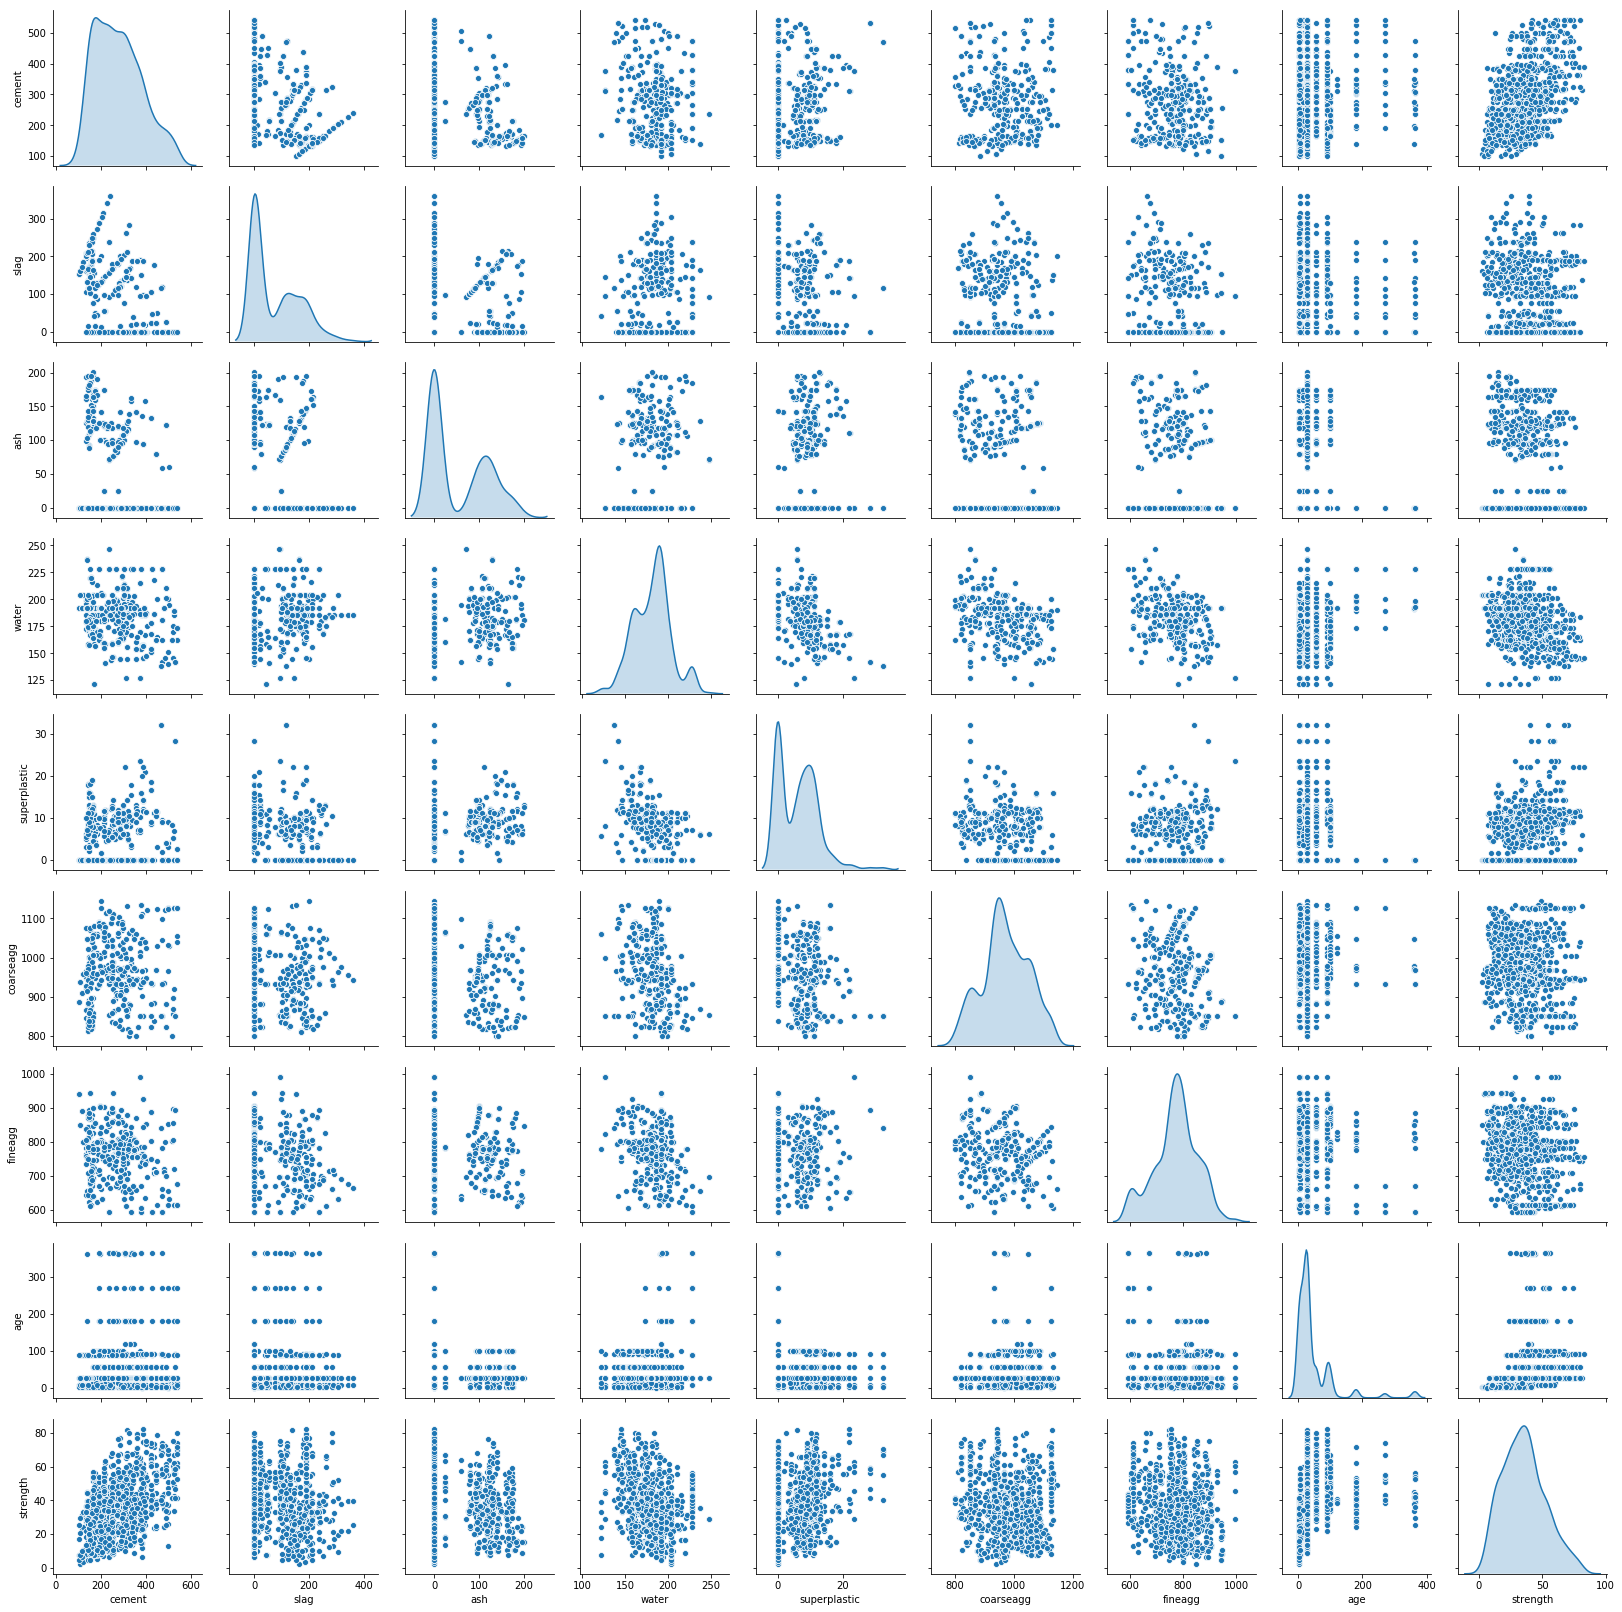

In [460]:
sns.pairplot(concrete_data, diag_kind = 'kde')

1. We can notice distinct gaussians on account of composition of slag, ash, super plastic and age.
2. Also we notice overlapping gaussians on account of water, coarseagg and fineagg
3. Composition of cement has the highest correlation to the strength of the concrete.
4. We also notice ouliers in slag, super plastic and age. The outliers noticed in age is significant with a longer right tail. Since the number of data points with age greater than 200 days is only 33 I suggest we exclude these data in the training data in order to address the issue of data noise caused by these outliers. Also for these line items there could be a possibility that the age is over 200 days as the data collected could be maturity (days since the concrete was laid) and not the age at which it attained maximum strength possible.

Since the use of ash has a very distinct mixture in the distribution as compared to other parameters where multiple gaussians were noticed the data set is split based on the use of ash in the mixutre

Also as can be seen from the pair plot above cement has the highest correlation with the strength of the concrete. Accordingly, building a feature for the composition of cement out of the total material used to make the concrete.

In [461]:
# Removing line items with age greater than 200
data_rev = concrete_data[concrete_data['age'] <= 200]

# Including a feature for ratio of cement to other materials used to make concrete
data_rev['cement_ratio'] = (data_rev['cement'])/(data_rev['cement']+data_rev['slag']+ data_rev['ash'] + data_rev['water'] + data_rev['superplastic'] + data_rev['coarseagg'] + data_rev['fineagg'])

# splitting the data set based on the use of ash
data_ash_na = data_rev[data_rev['ash'] == 0]
data_ash_na.drop(columns = 'ash', inplace = True)
data_ash_used = data_rev[data_rev['ash'] > 0]

# scaling the data using their z scores
data_ash_na=data_ash_na.apply(zscore)
data_ash_used = data_ash_used.apply(zscore)

C:\Users\Jarvis\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jarvis\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


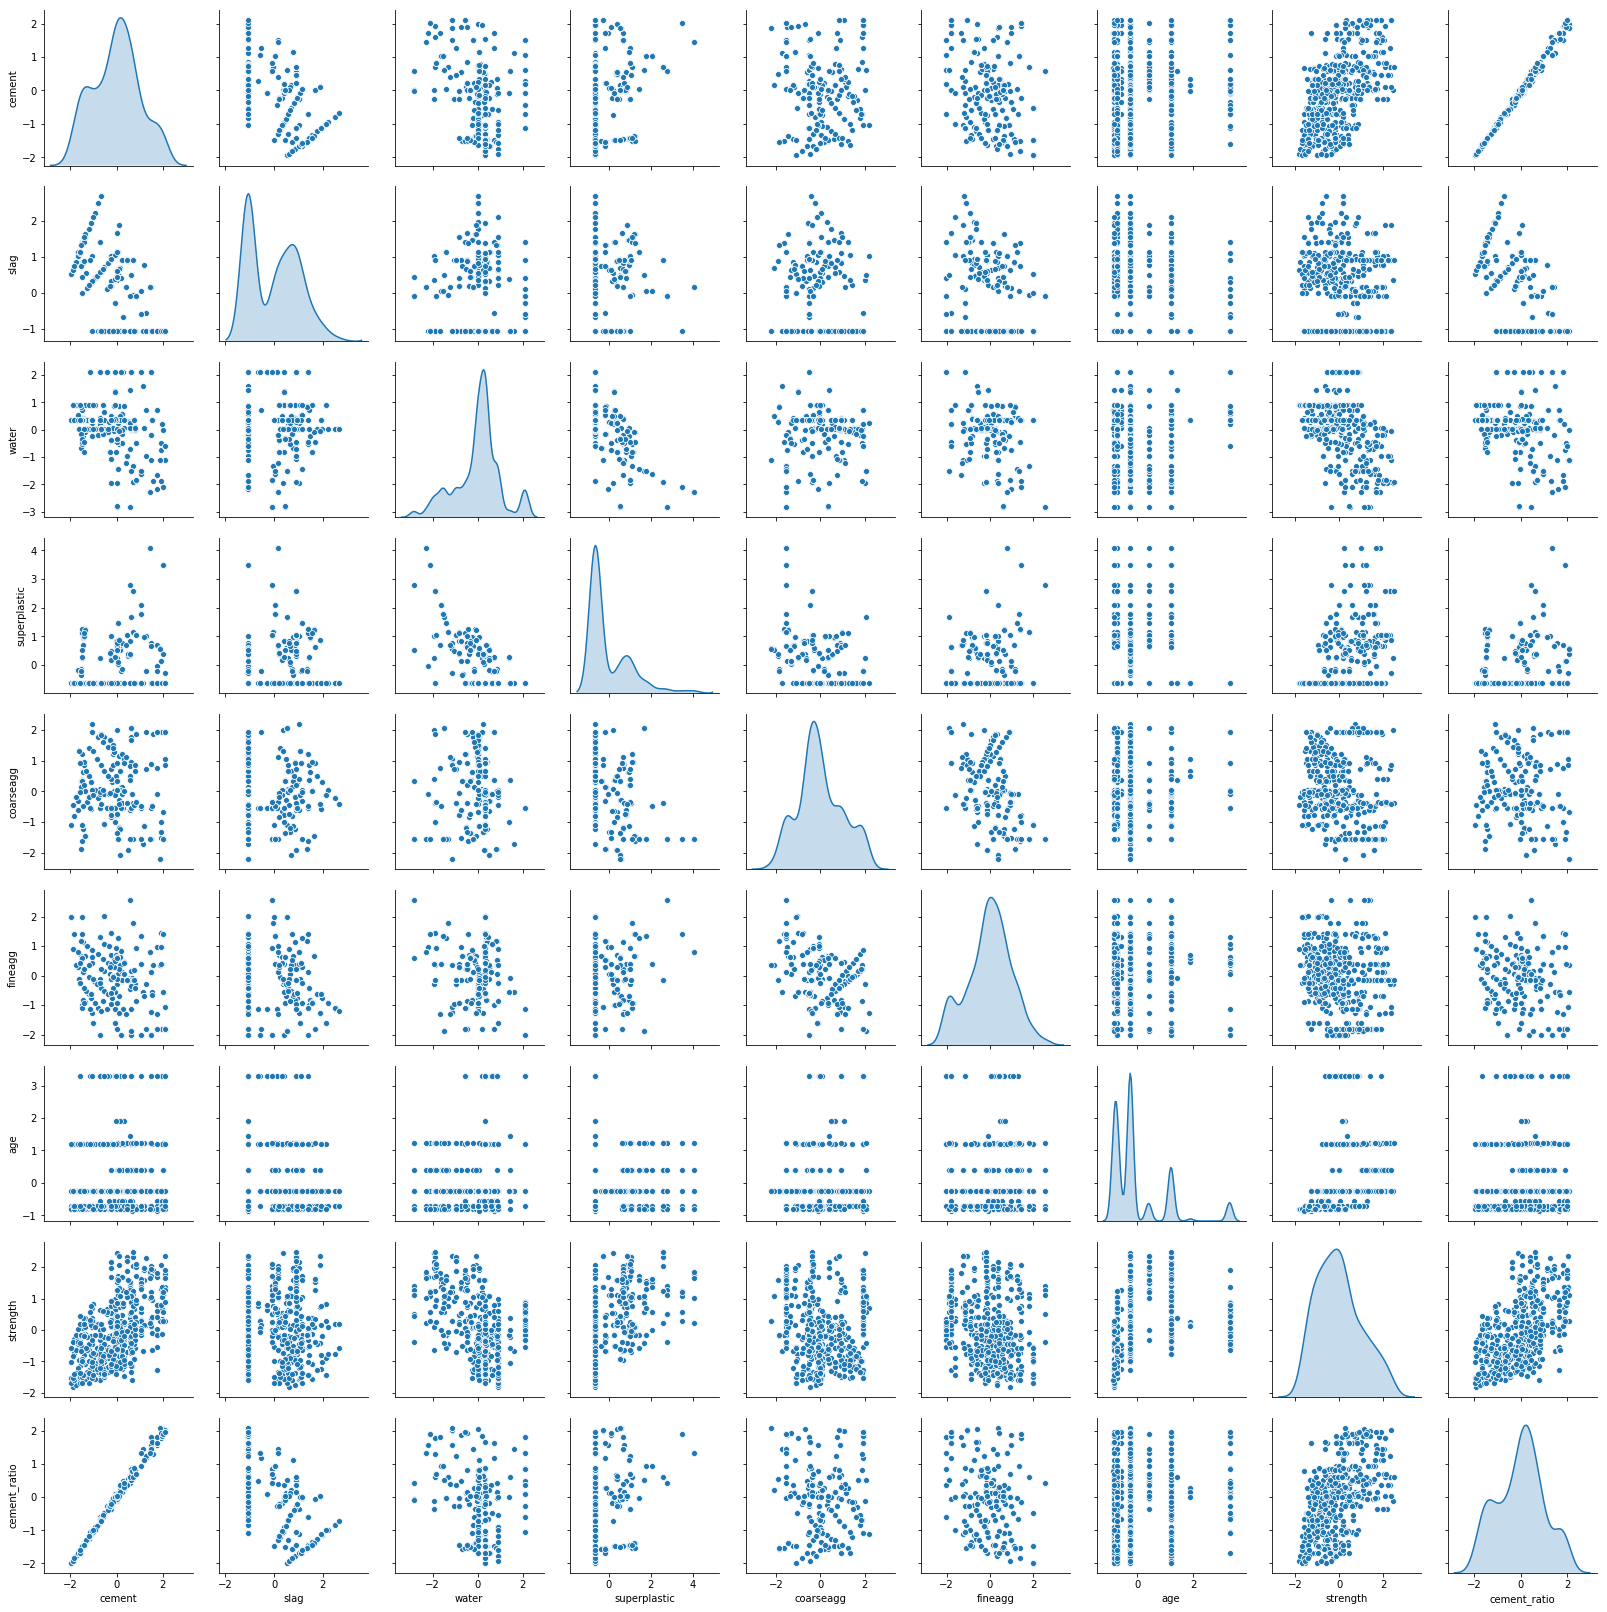

In [462]:
# plotting pair plots for the concrete made without ash
sns.pairplot(data_ash_na, diag_kind = 'kde')

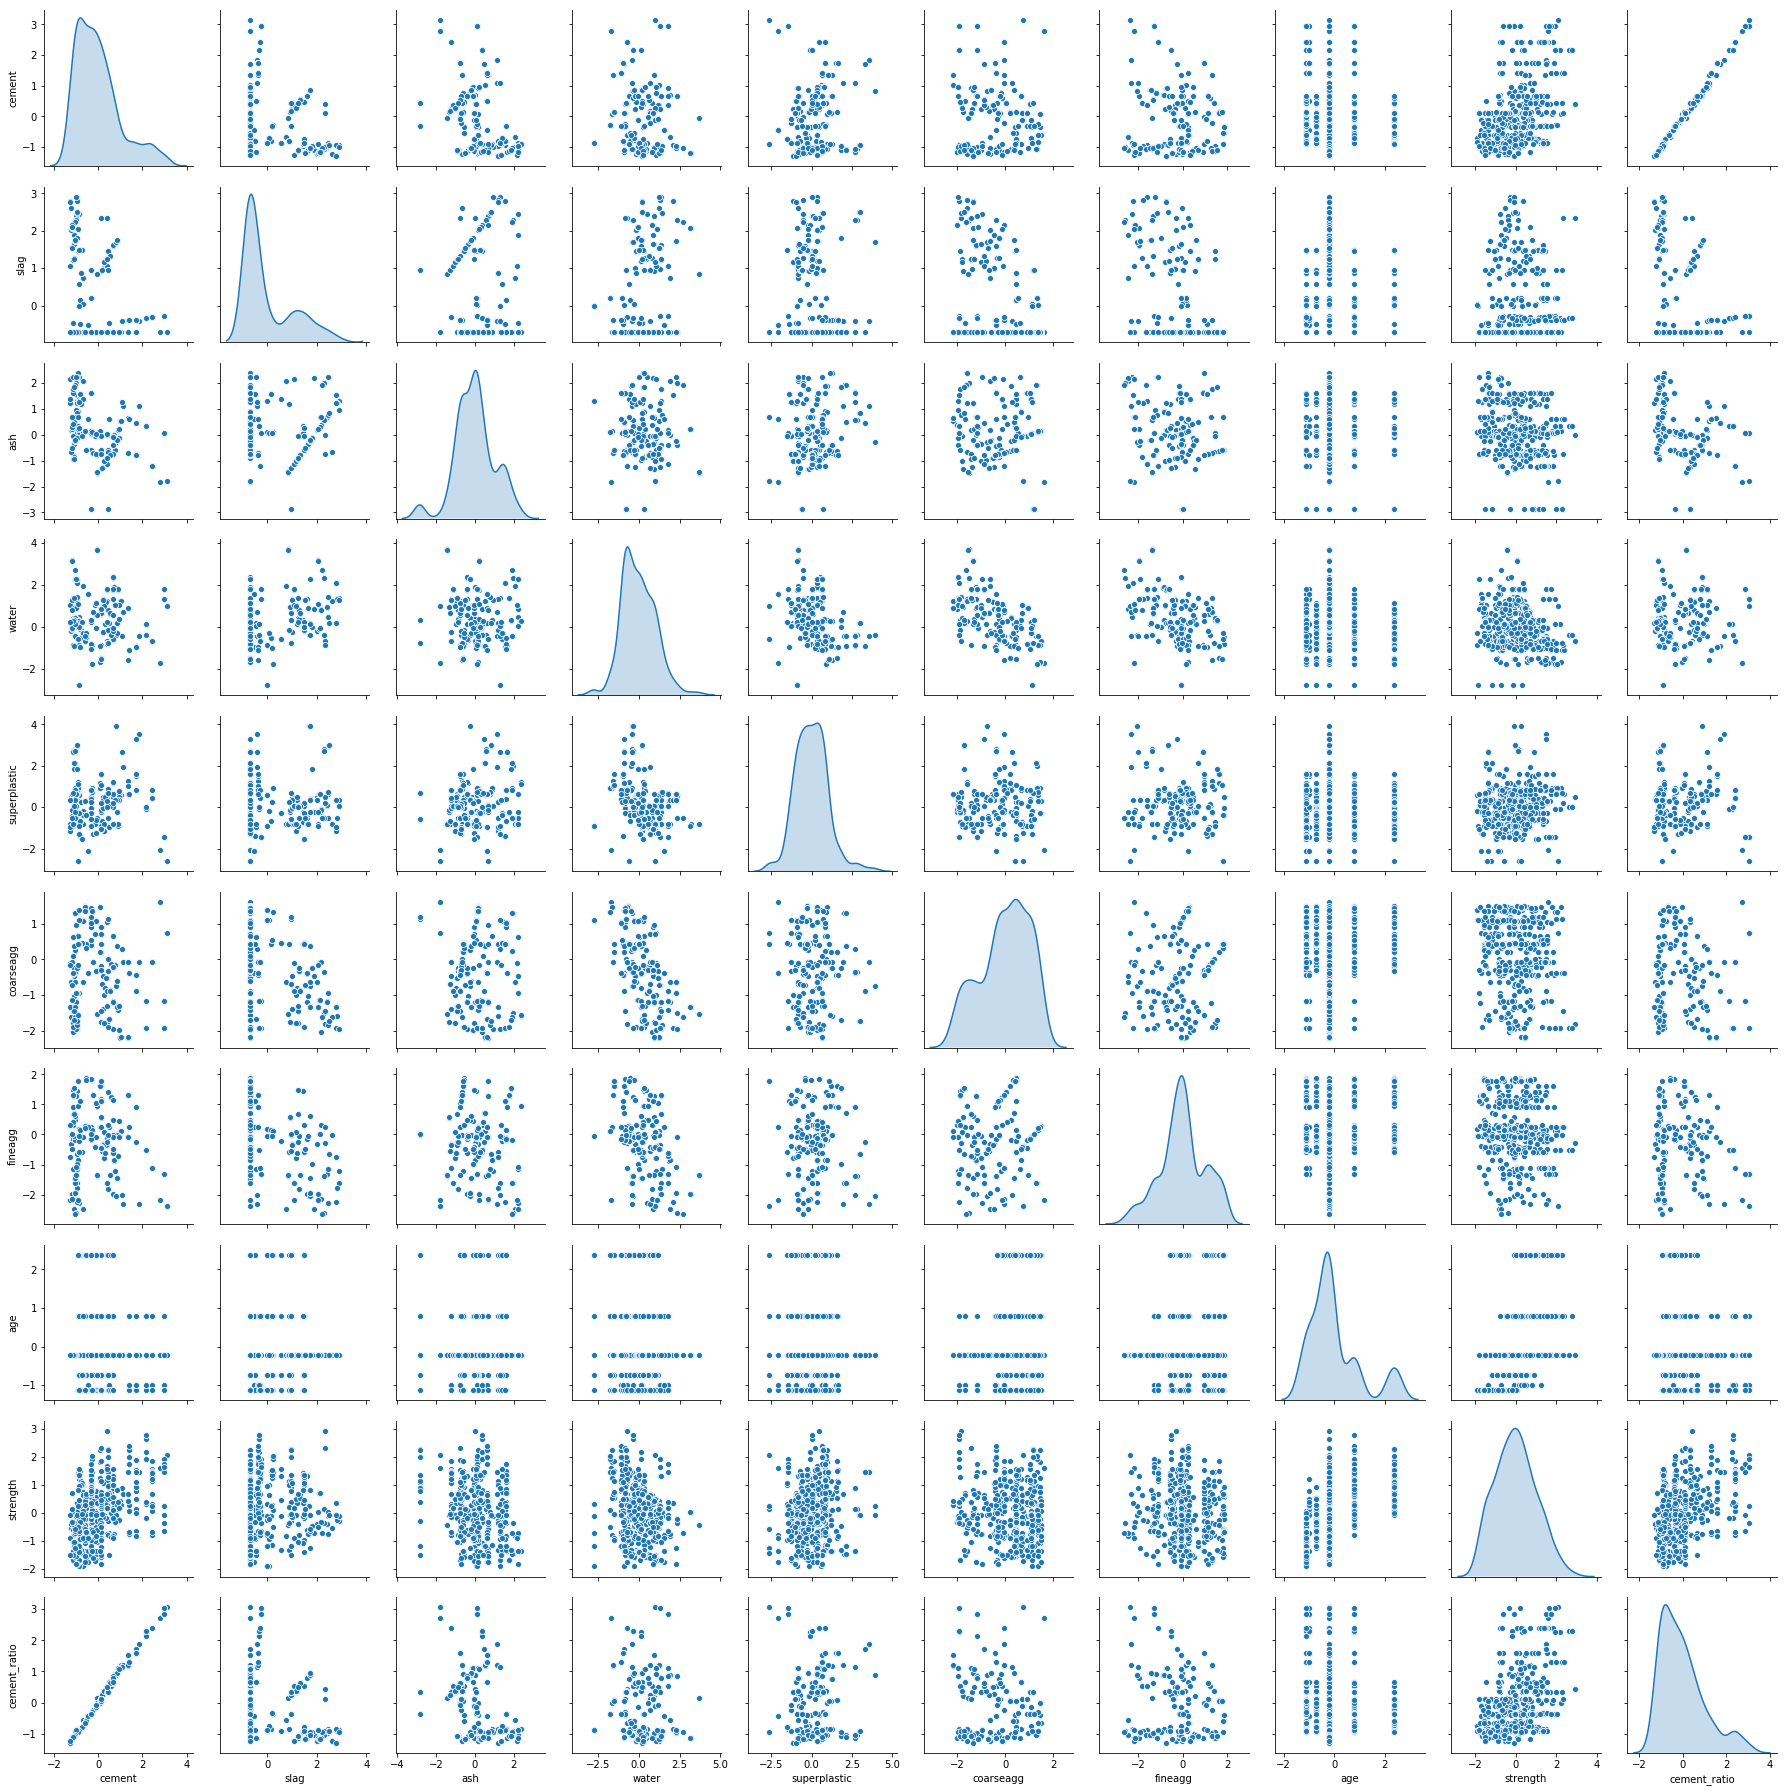

In [463]:
# plotting pair plots for the concrete made with ash
sns.pairplot(data_ash_used, diag_kind = 'kde')

## Building simple linear regression models on the base data

### Simple linear model for concrete made without ash

In [464]:
# splitting the data into dependent and independent variables
X = data_ash_na.iloc[:, data_ash_na.columns != 'strength']
y = data_ash_na['strength']

# splitting the data into training, validation and testing dataset
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2 , random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train1, y_train1, test_size=0.25 , random_state=1)

In [465]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_val)

In [466]:
# Evaluate the models performance
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_val, y_val))

0.7467992641423294
0.6413650282179952


### Simple linear model for concrete made using ash

In [467]:
# Split the data into input and target variables
X_ash = data_ash_used.iloc[:, data_ash_used.columns != 'strength']
y_ash = data_ash_used['strength']

# Split X and y into training, validation and test datasets
X_train_ash1, X_test_ash, y_train_ash1, y_test_ash = train_test_split(X_ash, y_ash, test_size=0.2 , random_state=1)
X_train_ash, X_val_ash, y_train_ash, y_val_ash = train_test_split(X_train_ash1, y_train_ash1, test_size=0.25 , random_state=1)

# invoke the LinearRegression function and find the bestfit model on training data
regression_model.fit(X_train_ash, y_train_ash)
y_pred_ash = regression_model.predict(X_val_ash)

In [468]:
# evaluate the models performance
print(regression_model.score(X_train_ash, y_train_ash))
print(regression_model.score(X_val_ash, y_val_ash))

0.7658986071119294
0.682841824265964


### Using Rigde model to regularize the simple linear model

#### Using Rigde model to regularize the simple linear model for concrete made without ash

In [469]:
# Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.1)
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_val)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.86705899  0.22909968 -0.49752726 -0.04558772 -0.20890191 -0.27072052
  0.47337298 -0.42534941]


In [470]:
# evaluating the performance
print(ridge.score(X_train, y_train))
print(ridge.score(X_val, y_val))

0.7466158103829115
0.6395130251321612


#### Using Rigde model to regularize the simple linear model for concrete made using ash

In [471]:
# Create a regularized RIDGE model and note the coefficients
ridge = Ridge(alpha=.1)
ridge.fit(X_train_ash,y_train_ash)
y_pred_ridge_ash = ridge.predict(X_val_ash)
print ("Ridge model:", (ridge.coef_))

Ridge model: [-2.10746929e+00  7.66992900e-01  2.66513644e-01 -1.87085339e-01
  1.45339631e-03  4.12876661e-01  3.73100335e-01  6.06076554e-01
  3.11748009e+00]


In [472]:
print(ridge.score(X_train_ash, y_train_ash))
print(ridge.score(X_val_ash, y_val_ash))

0.7599990033365399
0.680417768614276


### Using Lasso model to regularize the simple linear model

#### Using Lasso model to regularize the simple linear model for concrete made without ash

In [473]:
# Building the lasso linear model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, 3 of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.46707952  0.24325792 -0.1493023   0.14709215 -0.         -0.
  0.33879158  0.        ]


In [474]:
# Evaluation of the models performance
print(lasso.score(X_train, y_train))
print(lasso.score(X_val, y_val))

0.6882027042359572
0.6496216239632423


#### Using Lasso model to regularize the simple linear model for concrete made using ash

In [475]:
# Building the lasso linear model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_ash,y_train_ash)
print ("Lasso model:", (lasso.coef_))

# Observe, 5 of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.46397702  0.20206029 -0.         -0.19744673  0.         -0.
 -0.          0.50791428  0.        ]


In [476]:
# Evaluation of the models performance
print(lasso.score(X_train_ash, y_train_ash))
print(lasso.score(X_val_ash, y_val_ash))

0.6804952598081736
0.63273908309494


### Extracting polynomial features from the input variables using the Polynomial features function

#### Extracting polynomial features for data of concrete made without ash

In [477]:
# Building polynomial features
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias = False)
X_poly = poly.fit_transform(X)

# Splitting the data into training, testing and validation data sets
Xp_train1, Xp_test, yp_train1, yp_test = train_test_split(X_poly, y, test_size=0.20, random_state=1)
Xp_train, Xp_val, yp_train, yp_val = train_test_split(Xp_train1, yp_train1, test_size=0.25, random_state=1)

In [478]:
# Building a polynomial feature driven regression model
regression_model.fit(Xp_train, yp_train)
print(regression_model.coef_[0])

# Evaluating the models performance
print(regression_model.score(Xp_train, yp_train))
print(regression_model.score(Xp_val, yp_val))

5391095892397.957
0.9068953079643917
0.8183869489826243


#### Extracting polynomial features for data of concrete made without ash

In [479]:
# Building polynomial features
poly_ash = PolynomialFeatures(degree = 2, interaction_only=False, include_bias = False)
X_poly_ash = poly_ash.fit_transform(X_ash)

# Splitting the data into training, testing and validation data sets
Xp_ash_train1, Xp_ash_test, yp_ash_train1, yp_ash_test = train_test_split(X_poly_ash, y_ash, test_size=0.20, random_state=1)
Xp_ash_train, Xp_ash_val, yp_ash_train, yp_ash_val = train_test_split(Xp_ash_train1, yp_ash_train1, test_size=0.25, random_state=1)

In [480]:
# Building a polynomial feature driven regression model
regression_model.fit(Xp_ash_train, yp_ash_train)
print(regression_model.coef_[0])

# Evaluating the models performance
print(regression_model.score(Xp_ash_train, yp_ash_train))
print(regression_model.score(Xp_ash_val, yp_ash_val))

9017819986641.738
0.9156903512205324
0.8235667996917536


### Extracting features using principal component analysis

#### Extracting features using PCA for data of concrete made without ash

In [481]:
# Performing PCA to extract 8 dimensions out of all 8 input variables
pca = PCA(n_components=8)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [482]:
# Presenting the derived eigen values and vectors and the corresponding variation explained by them
print('Eigen Values')
print(pca.explained_variance_)
print('% of variation explained by each eigen value')
print(pca.explained_variance_ratio_)
print('Eigen vectors')
print(pca.components_)

Eigen Values
[2.64286964e+00 2.17807761e+00 1.15570878e+00 1.11906370e+00
 7.30022618e-01 1.60653167e-01 2.82632890e-02 3.78796021e-04]
% of variation explained by each eigen value
[3.29738895e-01 2.71748895e-01 1.44192559e-01 1.39620518e-01
 9.10816212e-02 2.00439692e-02 3.52628278e-03 4.72606668e-05]
Eigen vectors
[[ 5.53270056e-01 -2.41866390e-01 -3.92166293e-01  4.04230418e-01
  -1.42988448e-01  8.16228276e-02 -9.99698895e-04  5.39525051e-01]
 [ 2.69439324e-01 -4.09518886e-01  3.76165519e-01 -4.19384008e-01
   4.05500982e-01 -4.08063710e-01  1.51712446e-01  2.97236582e-01]
 [ 1.02555450e-01  6.21793603e-01 -1.98198501e-02  2.54857923e-01
   4.79192860e-02 -7.25887670e-01 -8.33183534e-03  9.07255217e-02]
 [ 3.02242022e-02  6.86799065e-02  3.05903200e-01  2.33736640e-02
  -5.24015419e-01  2.72045471e-02  7.87992649e-01  6.31015825e-02]
 [-1.26204772e-01 -1.82702939e-02 -4.41477635e-01  1.73680808e-01
   6.12448705e-01  5.14188095e-02  5.92115680e-01 -1.74162966e-01]
 [ 1.96399020e-01

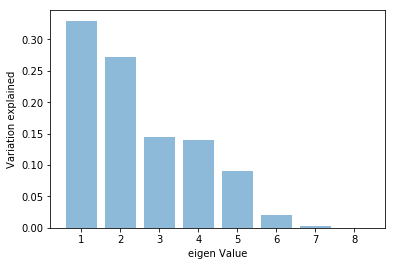

In [483]:
# Presenting a bar plot for the variabtion explained by each eigen value
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

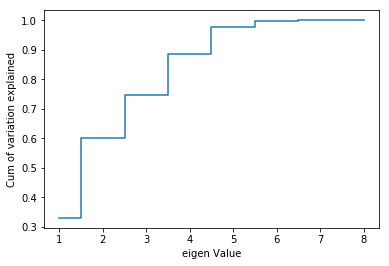

In [484]:
# Presenting an elbow plot for the variabtion explained by each eigen value
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [485]:
# Performing PCA to extract 4 dimensions out of all 8 input variables as the variance explained by 4 dimensions cover for 
# c.95% of variance as can be seen from the elbow plot above
pca4 = PCA(n_components=4)
pca4.fit(X)
print(pca4.components_)
print(pca4.explained_variance_ratio_)
Xpca4 = pca4.transform(X)

[[ 0.55327006 -0.24186639 -0.39216629  0.40423042 -0.14298845  0.08162283
  -0.0009997   0.53952505]
 [ 0.26943932 -0.40951889  0.37616552 -0.41938401  0.40550098 -0.40806371
   0.15171245  0.29723658]
 [ 0.10255545  0.6217936  -0.01981985  0.25485792  0.04791929 -0.72588767
  -0.00833184  0.09072552]
 [ 0.0302242   0.06867991  0.3059032   0.02337366 -0.52401542  0.02720455
   0.78799265  0.06310158]]
[0.32973889 0.27174889 0.14419256 0.13962052]


##### Building a regression model on the 4 dimensions extracted from PCA

In [486]:
# splitting the data into training, validation and testing set
X_train1_pca4, X_test_pca4, y_train1, y_test = train_test_split(Xpca4, y, test_size = 0.2, random_state = 6)
X_train_pca4, X_val_pca4, y_train, y_val = train_test_split(X_train1_pca4, y_train1, test_size=0.25, random_state=1)

In [487]:
# Building a regression model
regression_model.fit(X_train_pca4, y_train)
print(regression_model.coef_[0])

# Evaluation the model performance
print(regression_model.score(X_train_pca4, y_train))
print(regression_model.score(X_val_pca4, y_val))

0.3909987317665491
0.6398669265296002
0.7400260355076376


#### Extracting features using PCA for data of concrete made using ash

In [488]:
# Performing PCA to extract 9 dimensions out of all 9 input variables
pca_ash = PCA(n_components=9)
pca_ash.fit(X_ash)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [489]:
# Presenting the derived eigen values and vectors and the corresponding variation explained by them
print('Eigen Values')
print(pca_ash.explained_variance_)
print('% of variation explained by each eigen value')
print(pca_ash.explained_variance_ratio_)
print('Eigen vectors')
print(pca_ash.components_)

Eigen Values
[2.43455697e+00 2.16659500e+00 1.23835459e+00 9.67750056e-01
 9.29742488e-01 8.18655014e-01 4.28603515e-01 3.48710332e-02
 3.09782240e-04]
% of variation explained by each eigen value
[2.69923342e-01 2.40213957e-01 1.37298413e-01 1.07296043e-01
 1.03082081e-01 9.07656301e-02 4.75199778e-02 3.86620890e-03
 3.43460673e-05]
Eigen vectors
[[ 0.61349452 -0.09378364 -0.30165818  0.10097766  0.08814049 -0.29245328
  -0.12772065 -0.1351985   0.6210846 ]
 [-0.14293656  0.50605909  0.0964785   0.53406675 -0.18181127 -0.41444239
  -0.43748295 -0.1416637  -0.11251743]
 [ 0.00933721  0.21408246  0.35719971 -0.35635183  0.73627374 -0.05593067
  -0.27565199 -0.27973995  0.006127  ]
 [ 0.01463692  0.42944452 -0.44347364 -0.12517525  0.21827085  0.1638285
  -0.22913407  0.6899421   0.0045812 ]
 [-0.16257185  0.31959681 -0.60626719 -0.08295975  0.15151855 -0.15190251
   0.46079493 -0.4579235  -0.17008204]
 [ 0.0447705   0.07719069 -0.22515533 -0.1184336  -0.27197614  0.64896591
  -0.4840046

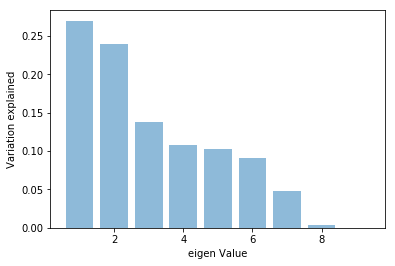

In [490]:
# Presenting a bar plot for the variabtion explained by each eigen value
plt.bar(list(range(1,10)),pca_ash.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

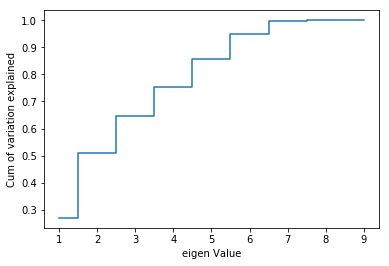

In [491]:
# Presenting an elbow plot for the variabtion explained by each eigen value
plt.step(list(range(1,10)),np.cumsum(pca_ash.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [492]:
# Performing PCA to extract 5 dimensions out of all 8 input variables as the variance explained by 5 dimensions cover for 
# c.95% of variance as can be seen from the elbow plot above
pca5 = PCA(n_components=5)
pca5.fit(X_ash)
print(pca5.components_)
print(pca5.explained_variance_ratio_)
Xpca5 = pca5.transform(X_ash)

[[ 0.61349452 -0.09378364 -0.30165818  0.10097766  0.08814049 -0.29245328
  -0.12772065 -0.1351985   0.6210846 ]
 [-0.14293656  0.50605909  0.0964785   0.53406675 -0.18181127 -0.41444239
  -0.43748295 -0.1416637  -0.11251743]
 [ 0.00933721  0.21408246  0.35719971 -0.35635183  0.73627374 -0.05593067
  -0.27565199 -0.27973995  0.006127  ]
 [ 0.01463692  0.42944452 -0.44347364 -0.12517525  0.21827085  0.1638285
  -0.22913407  0.6899421   0.0045812 ]
 [-0.16257185  0.31959681 -0.60626719 -0.08295975  0.15151855 -0.15190251
   0.46079493 -0.4579235  -0.17008204]]
[0.26992334 0.24021396 0.13729841 0.10729604 0.10308208]


##### Building a regression model on the 5 dimensions extracted from PCA

In [493]:
# splitting the data into training, validation and testing set
X_train1_pca5, X_test_pca5, y_ash_train1, y_ash_test = train_test_split(Xpca5, y_ash, test_size = 0.2, random_state = 6)
X_train_pca5, X_ash_val_pca5, y_ash_train, y_ash_val = train_test_split(X_train1_pca5, y_ash_train1, test_size=0.25, random_state=1)

In [494]:
# Building a regression model
regression_model.fit(X_train_pca5, y_ash_train)
print(regression_model.coef_[0])

# Evaluation the models performance
print(regression_model.score(X_train_pca5, y_ash_train))
print(regression_model.score(X_ash_val_pca5, y_ash_val))

0.23798073184875468
0.5696383862150135
0.6693981534453137


#### Based on the evaluation of the performance of the models as presented above, the regression model built using polynomial features has the highest accuracy score. Accordingly, the final models are built using the polynomial regression model

##### Polynomial regression model for data of concrete made without ash

In [495]:
# Building the polynomial regression model
regression_model.fit(Xp_train, yp_train)
yp_pred = regression_model.predict(Xp_test)
print(regression_model.coef_[0])

# Evaluating the accuracy score
print(regression_model.score(Xp_train, yp_train))
print(regression_model.score(Xp_val, yp_val))
print(regression_model.score(Xp_test, yp_test))

5391095892397.957
0.9068953079643917
0.8183869489826243
0.8571972475383698


##### Polynomial regression model for data of concrete made using ash

In [496]:
# Building the polynomial regression model
regression_model.fit(Xp_ash_train, yp_ash_train)
yp_pred_ash = regression_model.predict(Xp_ash_test)
print(regression_model.coef_[0])

# Evaluating the accuracy score
print(regression_model.score(Xp_ash_train, yp_ash_train))
print(regression_model.score(Xp_ash_val, yp_ash_val))
print(regression_model.score(Xp_ash_test, yp_ash_test))

9017819986641.738
0.9156903512205324
0.8235667996917536
0.8018261369569597
